# Simple Wine Quality Classifier on Wine Quality Dataset

In [229]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Dataset

In [167]:
df_m = pd.read_csv('../data/matches.csv')
df_d = pd.read_csv('../data/deliveries.csv')

# Analyze Train Dataset

In [168]:
df_m.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## We should drop umpire3 as it has no information other than `NaN`

In [169]:
df_m.drop(['umpire3'], axis = 1, inplace = True)

In [170]:
df_m.shape

(636, 17)

In [171]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
dtypes: int64(5), object(12)
memory usage: 84.5+ KB


In [172]:
# Replace team names with abbreviations to make it easy to view in plots
df_m.replace(
    ['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Daredevils',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants'
    ],
    ['SRH','RPS','KKR','KXIP','RCB','MI','DD','GL','CSK','RR','DC','PW','KTK','RPS'],
    inplace=True
)

In [173]:
df_m[df_m['result'] == 'no result'] 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,DD,PW,DD,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,DD,RCB,RCB,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


## City values are `NaN`

In [174]:
df_m['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Cuttack',
       'Nagpur', 'Dharamsala', 'Kochi', 'Visakhapatnam', 'Raipur',
       'Ranchi', 'Abu Dhabi', 'Sharjah', nan], dtype=object)

In [175]:
df_m['team1'].unique()
df_m['team1'].value_counts()

array(['SRH', 'MI', 'GL', 'RPS', 'RCB', 'KKR', 'DD', 'KXIP', 'CSK', 'RR',
       'DC', 'KTK', 'PW'], dtype=object)

MI      82
CSK     77
KXIP    77
RCB     70
KKR     68
DD      63
RR      54
SRH     46
DC      43
PW      20
RPS     15
GL      14
KTK      7
Name: team1, dtype: int64

In [176]:
df_m['team2'].unique()
df_m['team2'].value_counts()

array(['RCB', 'RPS', 'KKR', 'KXIP', 'DD', 'SRH', 'MI', 'GL', 'RR', 'CSK',
       'DC', 'PW', 'KTK'], dtype=object)

DD      84
RCB     82
KKR     80
MI      75
KXIP    71
RR      64
CSK     54
DC      32
SRH     30
PW      26
GL      16
RPS     15
KTK      7
Name: team2, dtype: int64

In [177]:
df_m['toss_winner'].unique()
df_m['toss_winner'].value_counts()

array(['RCB', 'RPS', 'KKR', 'KXIP', 'SRH', 'MI', 'GL', 'DD', 'CSK', 'RR',
       'DC', 'KTK', 'PW'], dtype=object)

MI      85
KKR     78
DD      72
RCB     70
KXIP    68
CSK     66
RR      63
DC      43
SRH     35
PW      20
GL      15
RPS     13
KTK      8
Name: toss_winner, dtype: int64

In [178]:
df_m['toss_decision'].unique()
(df_m['toss_decision'].value_counts())/df_m['toss_decision'].count() * 100

array(['field', 'bat'], dtype=object)

field    57.075472
bat      42.924528
Name: toss_decision, dtype: float64

In [179]:
df_m['result'].unique()
df_m['result'].value_counts()

array(['normal', 'tie', 'no result'], dtype=object)

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [180]:
df_m['winner'].unique()
df_m['winner'].value_counts()

array(['SRH', 'RPS', 'KKR', 'KXIP', 'RCB', 'MI', 'DD', 'GL', 'CSK', 'RR',
       'DC', 'PW', 'KTK', nan], dtype=object)

MI      92
CSK     79
KKR     77
RCB     73
KXIP    70
RR      63
DD      62
SRH     42
DC      29
RPS     15
GL      13
PW      12
KTK      6
Name: winner, dtype: int64

In [181]:
df_m['dl_applied'].unique()
df_m['dl_applied'].value_counts()
df_m[df_m['dl_applied'] == 1]['dl_applied'].count()

array([0, 1])

0    620
1     16
Name: dl_applied, dtype: int64

16

In [182]:
df_m['win_by_runs'].max()
df_m['win_by_runs'].min()

146

0

In [183]:
df_m['win_by_wickets'].max()
df_m['win_by_wickets'].min()

10

0

## Finding which columns contain `NaN` Values

In [188]:
df_m.isna().any()
df_m.isnull().sum()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
dtype: bool

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [278]:
df = df_m[['team1', 'team2', 'toss_winner','venue', 'toss_decision','winner']]
df = df[df['winner'].notna()]
df.head()

,team1,team2,toss_winner,venue,toss_decision,winner
0,SRH,RCB,RCB,"Rajiv Gandhi International Stadium, Uppal",field,SRH
1,MI,RPS,RPS,Maharashtra Cricket Association Stadium,field,RPS
2,GL,KKR,KKR,Saurashtra Cricket Association Stadium,field,KKR
3,RPS,KXIP,KXIP,Holkar Cricket Stadium,field,KXIP
4,RCB,DD,RCB,M Chinnaswamy Stadium,bat,RCB


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 635
Data columns (total 6 columns):
team1            633 non-null object
team2            633 non-null object
toss_winner      633 non-null object
venue            633 non-null object
toss_decision    633 non-null object
winner           633 non-null object
dtypes: object(6)
memory usage: 34.6+ KB


In [280]:
le = LabelEncoder()

In [281]:
df_e = df.apply(le.fit_transform)
df_e.head()

,team1,team2,toss_winner,venue,toss_decision,winner
0,12,9,9,23,1,12
1,7,10,10,16,1,10
2,3,4,4,25,1,4
3,10,6,6,11,1,6
4,9,2,9,14,0,9


In [291]:
X= df_e.drop(['winner'], axis=1)
y = df_e['winner']
X.head()
y.head()

,team1,team2,toss_winner,venue,toss_decision
0,12,9,9,23,1
1,7,10,10,16,1
2,3,4,4,25,1
3,10,6,6,11,1
4,9,2,9,14,0


0    12
1    10
2     4
3     6
4     9
Name: winner, dtype: int64

In [292]:
X_ohe = pd.get_dummies(X, columns=X.columns, prefix = X.columns)
X_ohe.head()

,team1_0,team1_1,team1_2,team1_3,team1_4,team1_5,team1_6,team1_7,team1_8,team1_9,...,venue_27,venue_28,venue_29,venue_30,venue_31,venue_32,venue_33,venue_34,toss_decision_0,toss_decision_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Train Test Split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape, X_test.shape)

(506, 5) (127, 5)


In [293]:
models = []

models.append(("Logistic Regression:", LogisticRegression()))
models.append(("K-Nearest Neighbour:", KNeighborsClassifier()))
models.append(("Decision Tree Classifier:", DecisionTreeClassifier()))
models.append(("Random Forest Classifier:", RandomForestClassifier()))
models.append(("MLP:", MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("GradientBoostingClassifier:", GradientBoostingClassifier()))
models.append(("SVC:", SVC()))

print('Models appended...')

Models appended...


In [294]:
def run_models(X, y):
    results = []
    names = []
    for name,model in models:
        cv_result = cross_val_score(model, X, y.values.ravel(), cv = 5, scoring = "accuracy")
        names.append(name)
        results.append(cv_result)
    for i in range(len(names)):
        print(names[i],results[i].mean()*100)

# Function to run the Models with Cross Validation

In [295]:
run_models(X_ohe, y)

Logistic Regression: 54.0246150679
K-Nearest Neighbour: 49.6097073226
Decision Tree Classifier: 50.0434284059
Random Forest Classifier: 54.7041103327
MLP: 50.6967049884
GradientBoostingClassifier: 54.0523824838
SVC: 54.6651635086


# New Try Do Correlation Check and select features

In [296]:
df_2 = df_m.drop(['date'], axis = 1)
df_2.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [297]:
dfnew = df_2.dropna()
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 635
Data columns (total 16 columns):
id                 625 non-null int64
season             625 non-null int64
city               625 non-null object
team1              625 non-null object
team2              625 non-null object
toss_winner        625 non-null object
toss_decision      625 non-null object
result             625 non-null object
dl_applied         625 non-null int64
winner             625 non-null object
win_by_runs        625 non-null int64
win_by_wickets     625 non-null int64
player_of_match    625 non-null object
venue              625 non-null object
umpire1            625 non-null object
umpire2            625 non-null object
dtypes: int64(5), object(11)
memory usage: 83.0+ KB


## Apply LabelEncoding

In [298]:
le2 = LabelEncoder()
df_new = dfnew.apply(le2.fit_transform)
df_new.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,0,9,13,12,9,9,1,0,0,12,35,0,199,22,5,23
1,1,9,24,7,10,10,1,0,0,10,0,7,176,15,1,33
2,2,9,26,3,4,4,1,0,0,4,0,10,30,24,27,11
3,3,9,14,10,6,6,1,0,0,6,0,6,56,10,2,9
5,4,9,13,3,12,12,1,0,0,12,0,9,154,22,0,23


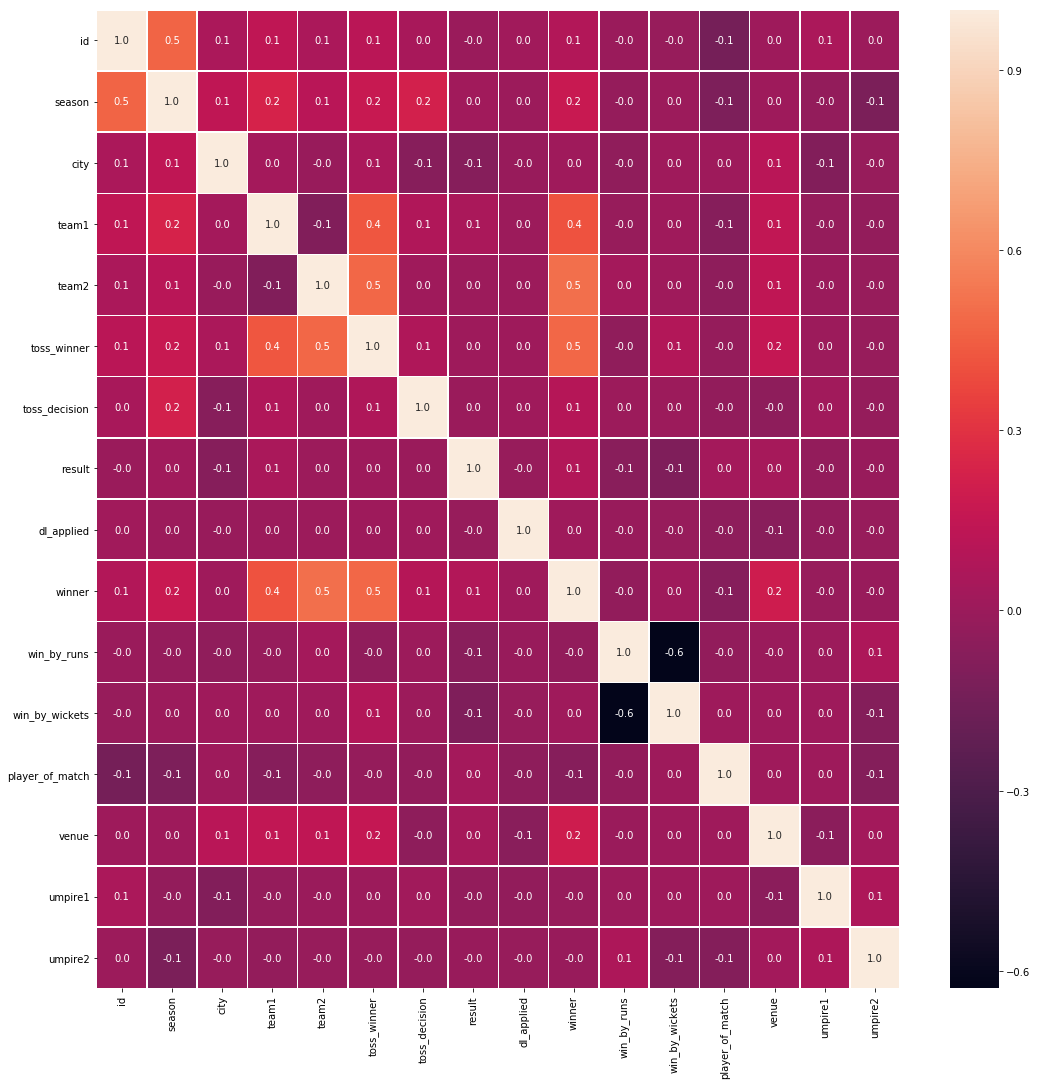

In [299]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_new.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

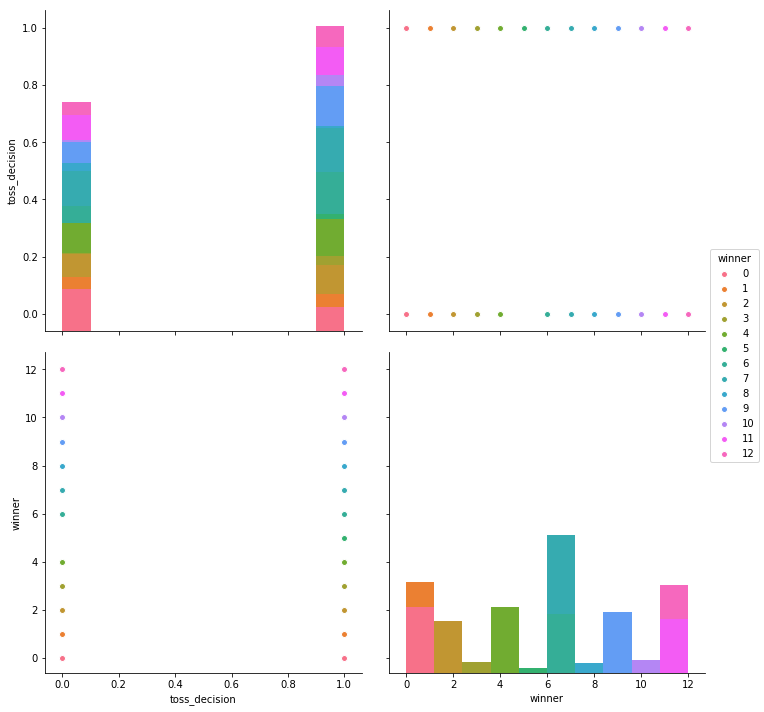

In [310]:
sns.pairplot(df_new, hue="winner", vars=["toss_decision", "winner"], size = 5)

In [306]:
X_new = df_new.drop(['winner', 'dl_applied', 'result', 'umpire1', 'umpire2', 'id'], axis = 1)
y_new = df_new['winner']

In [311]:
X_new_ohe = pd.get_dummies(X_new, columns=X_new.columns, prefix = X_new.columns)
X_new_ohe.head()

,season_0,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,...,venue_24,venue_25,venue_26,venue_27,venue_28,venue_29,venue_30,venue_31,venue_32,venue_33
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [312]:
run_models(X_new_ohe, y_new)

Logistic Regression: 63.2796429754
K-Nearest Neighbour: 67.8888977755
Decision Tree Classifier: 81.8971784286
Random Forest Classifier: 78.5324998099
MLP: 66.5652409868
GradientBoostingClassifier: 96.849658697
SVC: 15.0515158266


Best Results till now

- Logistic Regression: 63.2796429754
- K-Nearest Neighbour: 67.8888977755
- Decision Tree Classifier: 81.8971784286
- Random Forest Classifier: 78.5324998099
- MLP: 66.5652409868
- GradientBoostingClassifier: **96.849658697**
- SVC: 15.0515158266